## Pandas

### Spis treści:
* [Import biblioteki](#0)
* [Ćwiczenie 121](#1)
* [Ćwiczenie 122](#2)
* [Ćwiczenie 123](#3)
* [Ćwiczenie 124](#4)
* [Ćwiczenie 125](#5)
* [Ćwiczenie 126](#6)
* [Ćwiczenie 127](#7)
* [Ćwiczenie 128](#8)
* [Ćwiczenie 129](#9)
* [Ćwiczenie 130](#10)

### <a name='0'></a>Import biblioteki

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
np.__version__

'1.19.5'

Funkcja _fetch_financial_data()_ pobiera dane dotyczące notowań spółek giełdowych. Będzie wykorzystywana w poniższych ćwiczeniach. Aby pobrać dane konkretnej spółki należy przekazać odpowiedni ticker (symbol) spółki.

Kilka przykładowych tickerów spółek:
* AMZN - Amazon
* GOOGL - Google
* MSFT - Microsoft
* AAPL - Apple
* NKE - Nike
* WMT - Walmart

In [ ]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetches stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

### <a name='1'></a> Ćwiczenie 121
Wykorzystując funkcję _fetch_financial_data()_ pobierz notowania dla spółki Google (Alphabet) i przypisz do zmiennej _google_. Wyświetl obiekt _google_.

In [ ]:
google = fetch_financial_data(company='GOOGL')

In [ ]:
google

,Open,High,Low,Close,Volume
Date,,,,,
2021-05-07,2363.89,2371.2500,2346.1550,2351.93,1444862
2021-05-06,2306.33,2337.3500,2293.0418,2337.35,1259523
2021-05-05,2328.63,2335.0000,2308.2800,2314.77,1331809
2021-05-04,2313.55,2324.9899,2256.6800,2306.83,2240932
2021-05-03,2364.91,2381.5500,2335.5000,2343.08,1412139
...,...,...,...,...,...
2016-05-16,724.32,732.6800,720.0000,730.30,716115
2016-05-13,726.62,731.2900,723.5100,724.83,817350
2016-05-12,732.00,735.3700,724.2700,728.07,881204


### <a name='2'></a> Ćwiczenie 122
Wyświetl podstawowe informacje na temat obiektu _google_.

In [ ]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2021-05-07 to 2016-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


Wyświetl podstawowe statystyki o obiekcie _google_.

In [ ]:
google.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,1190.862811,1202.631914,1179.435319,1191.497375,1.730021e+06
std,342.539595,347.636933,338.514132,343.145436,8.297347e+05
min,682.490000,683.325000,672.660000,681.140000,4.656380e+05
25%,960.215000,965.967000,952.957500,961.210000,1.204919e+06
50%,1126.645000,1139.310000,1114.180000,1127.180000,1.526707e+06
75%,1333.327500,1349.417500,1320.165000,1338.867500,1.978642e+06
max,2392.495400,2431.380000,2373.850000,2392.760000,6.658855e+06


Zwróć uwagę na precyzję zapisu poszczególnych statystyk.
Spróbuj ustawić odpowiednie opcje biblioteki _pandas_, tak aby wyświetlać dane z dokładnością do dwóch miejsc po przecinku.

__Wskazówka:__ 
https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

In [ ]:
pd.set_option("precision", 2)
google.describe()

,Open,High,Low,Close,Volume
count,1258.00,1258.00,1258.00,1258.00,1.26e+03
mean,1190.86,1202.63,1179.44,1191.50,1.73e+06
std,342.54,347.64,338.51,343.15,8.30e+05
min,682.49,683.33,672.66,681.14,4.66e+05
25%,960.22,965.97,952.96,961.21,1.20e+06
50%,1126.64,1139.31,1114.18,1127.18,1.53e+06
75%,1333.33,1349.42,1320.16,1338.87,1.98e+06
max,2392.50,2431.38,2373.85,2392.76,6.66e+06


__Dodatkowo:__
Poniższe ustawienie stłumi także notację wykładniczą (patrz kolumna _Volume_).

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
google.describe()

,Open,High,Low,Close,Volume
count,1258.00,1258.00,1258.00,1258.00,1258.00
mean,1190.86,1202.63,1179.44,1191.50,1730021.30
std,342.54,347.64,338.51,343.15,829734.72
min,682.49,683.33,672.66,681.14,465638.00
25%,960.22,965.97,952.96,961.21,1204919.25
50%,1126.64,1139.31,1114.18,1127.18,1526707.00
75%,1333.33,1349.42,1320.16,1338.87,1978641.75
max,2392.50,2431.38,2373.85,2392.76,6658855.00


Zbuduj wykres ceny zamknięcia (_Close_) dla obiektu _google_.

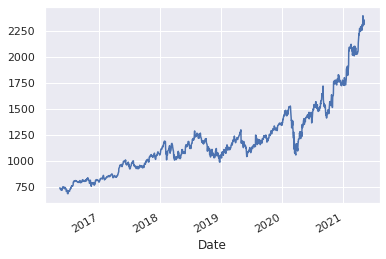

In [ ]:
google['Close'].plot()

### <a name='3'></a> Ćwiczenie 123
Zamień indeks _Date_ na kolumnę. Przypisz trwale zmiany do zniennej _google_.

In [ ]:
google = google.reset_index()

Przypisz dwie nowe kolumny do obiektu _google_ dodając kolumnę z aktualnym numerem miesiąca o nazwie _'Month'_ oraz z rokiem o nazwie _'Year'_.

In [ ]:
google['Month'] = google["Date"].dt.month
google['Year'] = google["Date"].dt.year

In [ ]:
google

,Date,Open,High,Low,Close,Volume,Month,Year
0,2021-05-07,2363.89,2371.25,2346.16,2351.93,1444862,5,2021
1,2021-05-06,2306.33,2337.35,2293.04,2337.35,1259523,5,2021
2,2021-05-05,2328.63,2335.00,2308.28,2314.77,1331809,5,2021
3,2021-05-04,2313.55,2324.99,2256.68,2306.83,2240932,5,2021
4,2021-05-03,2364.91,2381.55,2335.50,2343.08,1412139,5,2021
...,...,...,...,...,...,...,...,...
1253,2016-05-16,724.32,732.68,720.00,730.30,716115,5,2016
1254,2016-05-13,726.62,731.29,723.51,724.83,817350,5,2016
1255,2016-05-12,732.00,735.37,724.27,728.07,881204,5,2016
1256,2016-05-11,740.52,740.80,727.90,730.55,1007524,5,2016


### <a name='4'></a> Ćwiczenie 124
Policz średnią cenę zamknięcia (_Close_) dla poszczególnego roku (pogrupuj dane po roku - kolumna _Year_ i następnie policz wartość średnią).

In [ ]:
close_year = google.groupby('Year')['Close'].mean()

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.

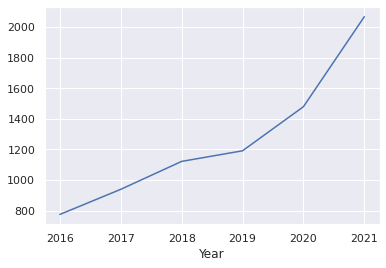

In [ ]:
close_year.plot()

Policz średnią cenę zamknięcia (_Close_) dla miesiąca (pogrupuj dane po miesiącu - kolumna _Month_ i następnie policz wartość średnią).

In [ ]:
month_close = google.groupby('Month')['Close'].mean()

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.
Zauważ, które miesiące mogą wskazywać na słabsze okresy na giełdzie.

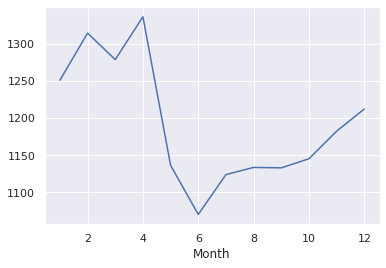

In [ ]:
month_close.plot()

### <a name='5'></a> Ćwiczenie 125
Pogrupuj dane z obiektu _google_ na poziomie roku i miesiąca. Następnie policz wartość średnią.

In [ ]:
google.groupby(['Month','Year'])['Close'].mean()

Month  Year
1      2017    830.25
       2018   1139.42
       2019   1080.99
       2020   1436.17
       2021   1800.20
                ...  
12     2016    800.59
       2017   1053.90
       2018   1048.09
       2019   1340.99
       2020   1767.71
Name: Close, Length: 61, dtype: float64

### <a name='6'></a> Ćwiczenie 126
Znajdź indeks dla którego kolumna _Close_ przyjmuje wartość największą.

In [ ]:
google['Close'].argmax()

6

Wytnij wiersz dla tego indeksu z obiektu _google_ jako obiekt DataFrame. Odczytaj datę.

In [ ]:
google.iloc[[google['Close'].argmax()]]

,Date,Open,High,Low,Close,Volume,Month,Year
6,2021-04-29,2389.23,2404.16,2373.85,2392.76,2061654,4,2021


In [ ]:
google.iloc[[6]]

,Date,Open,High,Low,Close,Volume,Month,Year
6,2021-04-29,2389.23,2404.16,2373.85,2392.76,2061654,4,2021


### <a name='7'></a> Ćwiczenie 127
Z obiektu _google_ wytnij kolumny _Date_, _Open_, _Close_, _Volume_.
Nie zmieniaj pierwotnego obiektu _google_!


In [ ]:
google[['Date','Open','Close','Volume']]

,Date,Open,Close,Volume
0,2021-05-07,2363.89,2351.93,1444862
1,2021-05-06,2306.33,2337.35,1259523
2,2021-05-05,2328.63,2314.77,1331809
3,2021-05-04,2313.55,2306.83,2240932
4,2021-05-03,2364.91,2343.08,1412139
...,...,...,...,...
1253,2016-05-16,724.32,730.30,716115
1254,2016-05-13,726.62,724.83,817350
1255,2016-05-12,732.00,728.07,881204
1256,2016-05-11,740.52,730.55,1007524


### <a name='8'></a> Ćwiczenie 128
Ustaw z powrotem indeks dla kolumny _Date_. Wyświetl obiekt _google_.

In [ ]:
google = google.set_index('Date')
google

,Open,High,Low,Close,Volume,Month,Year
Date,,,,,,,
2021-05-07,2363.89,2371.25,2346.16,2351.93,1444862,5,2021
2021-05-06,2306.33,2337.35,2293.04,2337.35,1259523,5,2021
2021-05-05,2328.63,2335.00,2308.28,2314.77,1331809,5,2021
2021-05-04,2313.55,2324.99,2256.68,2306.83,2240932,5,2021
2021-05-03,2364.91,2381.55,2335.50,2343.08,1412139,5,2021
...,...,...,...,...,...,...,...
2016-05-16,724.32,732.68,720.00,730.30,716115,5,2016
2016-05-13,726.62,731.29,723.51,724.83,817350,5,2016
2016-05-12,732.00,735.37,724.27,728.07,881204,5,2016


### <a name='9'></a> Ćwiczenie 129
Usuń na stałe kolumny _Year_ i _Month_ z obiektu _google_. Wyświetl obiekt _google_.

In [ ]:
google = google.drop(columns=['Year','Month'])
google

,Open,High,Low,Close,Volume
Date,,,,,
2021-05-07,2363.89,2371.25,2346.16,2351.93,1444862
2021-05-06,2306.33,2337.35,2293.04,2337.35,1259523
2021-05-05,2328.63,2335.00,2308.28,2314.77,1331809
2021-05-04,2313.55,2324.99,2256.68,2306.83,2240932
2021-05-03,2364.91,2381.55,2335.50,2343.08,1412139
...,...,...,...,...,...
2016-05-16,724.32,732.68,720.00,730.30,716115
2016-05-13,726.62,731.29,723.51,724.83,817350
2016-05-12,732.00,735.37,724.27,728.07,881204


### <a name='10'></a> Ćwiczenie 130
Przypisz polskie nazwy kolumn (bez polskich znaków):
* Open -> Otwarcie
* High -> Najwyzszy
* Low -> Najnizszy
* Close -> Zamkniecie
* Volume -> Wolumen

do obiektu _google_. Wyświetl obiekt _google_.

In [ ]:
google.rename(columns={'Open':'Otwarcie','High':'Najwyższy','Low':'Najniższy','Close':'Zamknięcie','Volume':'Wol'})

,Otwarcie,Najwyższy,Low,Close,Volume
Date,,,,,
2021-05-07,2363.89,2371.25,2346.16,2351.93,1444862
2021-05-06,2306.33,2337.35,2293.04,2337.35,1259523
2021-05-05,2328.63,2335.00,2308.28,2314.77,1331809
2021-05-04,2313.55,2324.99,2256.68,2306.83,2240932
2021-05-03,2364.91,2381.55,2335.50,2343.08,1412139
...,...,...,...,...,...
2016-05-16,724.32,732.68,720.00,730.30,716115
2016-05-13,726.62,731.29,723.51,724.83,817350
2016-05-12,732.00,735.37,724.27,728.07,881204
